In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import misc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [3]:
nfl_draft = pd.read_csv("nfl_draft_data.csv")

In [4]:
nfl_draft = pd.read_csv("nfl_draft_data.csv")

In [5]:
final_nfl_draft = nfl_draft.join((pd.get_dummies(nfl_draft['POS'])))
final_nfl_draft = final_nfl_draft.drop(['POS'],axis=1)

In [6]:
final_nfl_draft.head()

,DRAFT_YEAR,PLAYER,COLLEGE,HEIGHT,WEIGHT,FORTY_YARD,BENCH_PRESS,VERTICAL_LEAP,BROAD_JUMP,SHUTTLE,...,OG,OL,OLB,OT,P,QB,RB,SS,TE,WR
0,2017,John Johnson,Boston College,72.63,208,4.61,14.0,37.0,119.0,4.18,...,0,0,0,0,0,0,0,0,0,0
1,2017,Matt Milano,Boston College,72.25,223,4.67,24.0,35.0,126.0,4.38,...,0,0,1,0,0,0,0,0,0,0
2,2016,Mehdi Abdesmad,Boston College,78.25,284,5.10,25.0,29.5,108.0,4.62,...,0,0,0,0,0,0,0,0,0,0
3,2016,Steven Daniels,Boston College,71.50,243,4.86,16.0,32.0,112.0,4.54,...,0,0,0,0,0,0,0,0,0,0
4,2016,Justin Simmons,Boston College,74.38,202,4.61,16.0,40.0,126.0,3.85,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = final_nfl_draft.drop(['FIRST_ROUND_PICK','PLAYER','COLLEGE'], axis=1)
y = final_nfl_draft['FIRST_ROUND_PICK']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=100)

In [9]:
DT = tree.DecisionTreeClassifier()

In [10]:
DTparams = {'max_depth':range(1,20)}

cvDT = GridSearchCV(DT, param_grid=DTparams)

cvDTfit = cvDT.fit(X_train,y_train)

In [11]:
y_pred=cvDTfit.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.91759205143191114

In [17]:
train_sizes, train_scores, test_scores = learning_curve(cvDT, X, y, train_sizes=np.linspace(.01, 1., 100), cv=None)


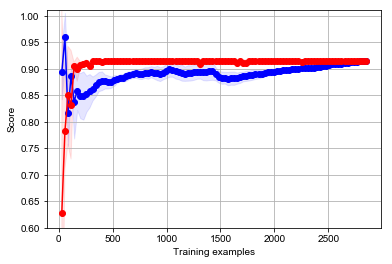

In [20]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
#plt.gca().invert_yaxis()
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.style.use('seaborn')
plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8784235136940548

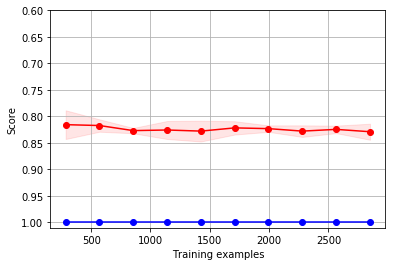